# Lesson 5: Putting it all together

# Goals for this lesson

Picking up the pieces of all that we have learned in the past weeks.

Putting our new knowledge together to make a program which uses (almost) all of it.

NOTE: The last 5-10 minutes will be spent on a midway evaluation. So, please, think about a few points on what is working well and what can be improved.

# The topics we have covered so far

Variables

_for_-loops

Numbers and arithmetic

_if_-statements

Strings

Lists

### Let's try to use it all in a program which ...

1. reads in a folder of transcript files (we'll be putting a bit more weight on this today)
1. cleans these transcript files and stores all utterances in a nice, structured way
1. makes a few calculations for each transcript
1. reports and/or plots the results

Hopefully, most questions that I received from you will be answered to some degree through this.

We will do this on the transcripts with Adam from Brown (1973). The data can be download [here](https://childes.talkbank.org/access/Eng-NA/Brown.html) (only 4.5 MB).

The following code blocks will be extensively commented - maybe too much. This is to provide answers to any questions that I figured could arise.

# Step 1: reading in the files

Heinold (2012, ch. 12) provides details on file reading. Ethan has also shown other nifty things when reading in files.

The main steps of reading in a file is:
1. pointing to the file with a valid filepath
1. opening the file with `open()`
1. reading in the contents of the file, e.g. with `.read()`

First, we'll make the long version with all steps spelled out. Then, we'll make the short version resembling Ethan's format.

Since we want to work with more than one file, we point to the folder containing the files. Then, we use the glob() function from the glob module to show point to all files in that folder.

### The long version

In [43]:
import os  # introduces functionality to control things related to the operating system
import glob  # the functionality of this module is mainly in this one function, hence the same name

# point to the folder containing the transcript files
data_folder = "/home/kasper/python-projects/CLA_2019/CLA_2018/Data/Brown/Sarah"

# change working directory (=the folder in which the program currently stands)
os.chdir(data_folder)

# make a list of filenames using glob()
filenames = glob.glob('*.cha')  # the transcript files are saved with the .cha file extension (used in e.g. CLAN)
filenames.sort()  # it's nice to have them in order

file_contents = []  # make empty list to store raw file contents
for filename in filenames:  # loop over the list of file names one by one
    file = open(filename, encoding='utf-8')  # this actually loads the file and allows Python to read the contents
    raw_content = file.read()  # this reads in ALL content from the file to ONE string
    file_contents.append(raw_content)  # add the raw content to the list so that we can use it later
    file.close()  # close the file since we don't need it anymore; see the short version for a prettier way

### The short version

In [4]:
from os import chdir as cd
import glob

pathin = '/home/kasper/python-projects/CLA_2019/CLA_2018/Data/Brown/Adam'  # the path pointing to our data folder
cd(pathin)  # change working directory to the data folder

file_contents = []  # make empty list to store raw file contents

# loop over all files in the folder with the .cha extension
# note that sorted() is needed here; otherwise, the files will be in a random order
for file in sorted(glob.glob('*.cha')):
    with open(file,'r', encoding='utf-8') as f:  # read the file and close it when the block is finished
        text = f.read()  # read in the contents of the file ...
        file_contents.append(text)  # ... and append it to a list

### The extremely short version
(but remember the thing about readable code)

In [24]:
import glob

file_contents = [
    open(file).read()
    for file in sorted(
        glob.glob('/home/kasper/python-projects/CLA_2019/CLA_2018/Data/Brown/Adam/*.cha')
    )
]

# Step 2: cleaning the data and storing it in a nice way

At this point, we have a list of raw contents of files.

We want to clean it from superfluous things.

And we want to store it in a nice way.

Let's have a look at a transcript file.

In [44]:
from string import punctuation

transcripts = []  # make empty list to store the cleaned transcripts in

for raw_content in file_contents:  # loop over the raw contents loaded in from before
    
    lines = raw_content.split('\n')  # split the content into lines ('\n' = newline character)
    utterance_lines = []  # prepare a list for cleaned utterance lines
    
    for line in lines:  # run over each line one by one to clean
        if line.startswith('*'):  # but only if it's an actual utterance line (and not metadata or grammar line)
            
            # see the contents of a transcript file to why these parts of the line are taken
            speaker = line[1:4]  
            utterance = line.split('\t')[1]  # ()'\t' = tab character)
            
            # since the utterance lines also contains punctuation, we will clean it
            cleaned_utterance = ''  # prepare empty string for the cleaned utterance
            for char in utterance:  # loop over each character in the utterance string
                if char not in punctuation:  # test if it's punctuation
                    cleaned_utterance += char  # if not, add it to the cleaned line
            cleaned_utterance = ' '.join(cleaned_utterance.split())  # removes superfluous spaces
            
            # we will store each line as a tuple where [0] is the speaker and [1] the actual utterance
            utterance_line = (speaker, cleaned_utterance)
            utterance_lines.append(utterance_line)  # finally, add it to the list of utterance lines
    
    # when all lines have been cleaned and stored, add the full transcript
    transcripts.append(utterance_lines)
    
transcripts[0][:20]  # let's see how the first transcript looks at this moment (just the first 20 lines)

[('GLO', 'now the next thing if you can just ask a play a game'),
 ('GLO', 'dont dont use the words yourself just ask her'),
 ('MOT', 'come here'),
 ('CHI', 'xxx'),
 ('GLO', 'alright'),
 ('CHI', 'xxx'),
 ('GLO', 'yeah'),
 ('GLO', 'whats this'),
 ('CHI', 'a nose'),
 ('GLO', 'your nose'),
 ('GLO', 'and whats that'),
 ('CHI', 'a eye'),
 ('MOT', '0'),
 ('CHI', 'hair'),
 ('MOT', 'hair'),
 ('MOT', 'wheres your teeth'),
 ('MOT', 'oh whats this'),
 ('MOT', 'whats this in here'),
 ('MOT', 'whats this in here'),
 ('MOT', 'whats that')]

Pay attention to the nested data structure here:

We have a list of transcripts.

Each transcript is a list of tuples.

Each of these tuples contain two strings: the speaker and the utterance, respectively.

```
[
    [(spkr, uttr), (spkr, uttr), (spkr, uttr), ...],
    [(spkr, uttr), (spkr, uttr), (spkr, uttr), ...],
    [(spkr, uttr), (spkr, uttr), (spkr, uttr), ...],
    ...
]
```

# Step 3: make some calculations for each transcript

This could be anything, of course, and also much more complex data processing.

Until now, we have seen at least TTR and MLU (with word count instead of morpheme count). So, let's get those metrics for each transcript!

In [45]:
mlus = []  # prepare a list to store MLU measures in
ttrs = []  # the same for TTR

for transcript in transcripts:  # loop over the transcripts one by one
    child_utterances = []  # prepare a list for only the child's utterances
    for line in transcript:
        if line[0] == 'CHI':
            child_utterances.append(line[1])
    
    tokens = []  # prepare a list for tokens
    for utterance in child_utterances:  # lopp over each utterance
        tokens += utterance.split()  # split it into tokens and add it to the token list
    
    ## calculate MLU: number of words / number of utterances
    mlu = len(tokens) / len(child_utterances)
    mlus.append(mlu)  # add it the appropriate list
    
    ## calculate TTR: number of types / number of tokens
    types = set(tokens)
    ttr = len(types) / len(tokens)
    ttrs.append(ttr)  # add it the appropriate list

# Step 4: report the results

There are practically infinite possibilities of presenting results. Part of conducting science is figuring this out: should I show a boxplot? Can I make a linear model?



In [54]:
import pandas as pd  # introduces utilities to work with DataFrames (kinda like spreadsheets)

# create a DataFrame with the lists that we have created
# we have not yet learned why it looks like this when we make DataFrames; we'll get back to that
df = pd.DataFrame({
        'file': filenames,
        'no.': list(range(len(transcripts))),
        'mlu': mlus,
        'ttr': ttrs
    })

In [65]:
# if you print the "head" of the dataframe, you'll see why I compare it to a spreadsheet
df.head(20)

,file,no.,mlu,ttr
0,sarah001.cha,0,1.896000,0.320675
1,sarah002.cha,1,1.893417,0.208609
2,sarah003.cha,2,1.618705,0.237037
3,sarah004.cha,3,1.702703,0.309524
4,sarah005.cha,4,1.450704,0.271845
5,sarah006.cha,5,1.686131,0.248918
6,sarah007.cha,6,1.660494,0.245353
7,sarah008.cha,7,1.925258,0.165997
8,sarah009.cha,8,1.631783,0.275534
9,sarah010.cha,9,1.582609,0.206044


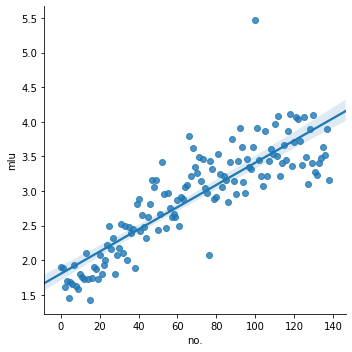

In [69]:
import seaborn as sns  # introduces lots of utilities for plotting


sns.lmplot(x='no.', y='mlu', data=df)

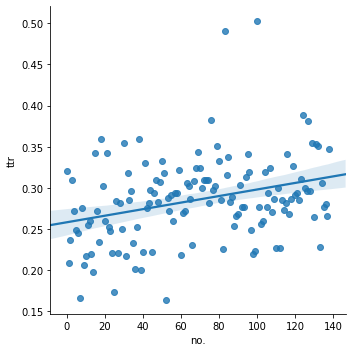

In [59]:
sns.lmplot(x='no.', y='ttr', data=df)

In [41]:
len(df)

55

## References

Brown, R. (1973). _A first language: The early stages_. Cambridge, MA: Harvard University Press.